<a href="https://colab.research.google.com/github/kaastha-nl/Retail-Sales-Analytics-EDA/blob/main/Retail_Sales_Analytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#reading data from csv
df= pd.read_csv("Retail_Transactions_Dataset.csv")
df. head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [65]:
df["Date"] = pd.to_datetime(df["Date"], format='mixed')

In [66]:
# Extracting required time features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  int64         
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  object        
 7   City               1000000 non-null  object        
 8   Store_Type         1000000 non-null  object        
 9   Discount_Applied   1000000 non-null  bool          
 10  Customer_Category  1000000 non-null  object        
 11  Season             1000000 non-null  object        
 12  Promotion          666057 non-null   object        
 13  Year               1000000 n

In [67]:
#cleaning data by droping duplicates
df = df.drop_duplicates()


In [68]:
# Total transactions
Total_Transactions=df['Transaction_ID'].count()
print(Total_Transactions)

1000000


In [69]:
# Unique customers
Unique_Customers = df['Customer_Name'].nunique()
print(Unique_Customers)

329738


In [70]:
# Total revenue

Total_revenue = df['Total_Cost'].sum()
print(f"${Total_revenue}")

$52455220.39999998


In [71]:
# Average spend per transaction
Average_spend = df['Total_Cost'].mean()
print(f"${Average_spend}")

$52.45522039999998


In [72]:
# Top 5 most common products
Top_Products = df['Product'].value_counts().head(5)
print(Top_Products)

Product
['Toothpaste']    4893
['Deodorant']     2541
['Honey']         2540
['Eggs']          2515
['Olive Oil']     2505
Name: count, dtype: int64


In [73]:
# Cities with highest number of transactions
Highest_Transaction_Cities = df['City'].value_counts()
print(Highest_Transaction_Cities)

City
Boston           100566
Dallas           100559
Seattle          100167
Chicago          100059
Houston          100050
New York         100007
Los Angeles       99879
Miami             99839
San Francisco     99808
Atlanta           99066
Name: count, dtype: int64


In [74]:
# Average spend per customer category
Top_Customer_categories_avg= df.groupby('Customer_Category')['Total_Cost'].mean()
print(Top_Customer_categories_avg)

Customer_Category
Homemaker         52.461417
Middle-Aged       52.411318
Professional      52.525762
Retiree           52.435589
Senior Citizen    52.342672
Student           52.487994
Teenager          52.529091
Young Adult       52.448246
Name: Total_Cost, dtype: float64


In [75]:
# Payment method preference by customer category
Preferred_Payment_Methods = df.groupby('Customer_Category')['Payment_Method'].value_counts()
print(Preferred_Payment_Methods)

Customer_Category  Payment_Method
Homemaker          Credit Card       31413
                   Cash              31360
                   Mobile Payment    31330
                   Debit Card        31315
Middle-Aged        Mobile Payment    31311
                   Debit Card        31198
                   Cash              31078
                   Credit Card       31049
Professional       Cash              31246
                   Credit Card       31201
                   Debit Card        31118
                   Mobile Payment    31086
Retiree            Credit Card       31408
                   Mobile Payment    31344
                   Cash              31269
                   Debit Card        31051
Senior Citizen     Cash              31442
                   Credit Card       31425
                   Debit Card        31420
                   Mobile Payment    31198
Student            Cash              31307
                   Debit Card        31287
                   M

In [76]:
# Top payment method preference by customer category
Preferred_Payment_Methods2 = Preferred_Payment_Methods.groupby(level=0).head(1)
print(Preferred_Payment_Methods2)

Customer_Category  Payment_Method
Homemaker          Credit Card       31413
Middle-Aged        Mobile Payment    31311
Professional       Cash              31246
Retiree            Credit Card       31408
Senior Citizen     Cash              31442
Student            Cash              31307
Teenager           Credit Card       31467
Young Adult        Debit Card        31363
Name: count, dtype: int64


In [77]:
# Top 5 most frequently purchased products
Top_Products = df['Product'].value_counts().head(5)
print(Top_Products)


Product
['Toothpaste']    4893
['Deodorant']     2541
['Honey']         2540
['Eggs']          2515
['Olive Oil']     2505
Name: count, dtype: int64


In [78]:
# Average number of items by store type
Avg_Total_Items = df.groupby("Store_Type")["Total_Items"].mean()
print(Avg_Total_Items)


Store_Type
Convenience Store    5.505574
Department Store     5.495547
Pharmacy             5.498182
Specialty Store      5.508395
Supermarket          5.485767
Warehouse Club       5.482233
Name: Total_Items, dtype: float64


In [79]:
# Cost of transactions where a discount was applied vs not applied
Avg_cost = df.groupby("Discount_Applied")["Total_Cost"].mean()
print(Avg_cost)


Discount_Applied
False    52.423512
True     52.486915
Name: Total_Cost, dtype: float64


In [80]:
# Average number of items purchased for different promotion types
Avg_items = df.groupby("Promotion")["Total_Items"].mean()
print(Avg_items)



Promotion
BOGO (Buy One Get One)        5.494351
Discount on Selected Items    5.501248
Name: Total_Items, dtype: float64


In [81]:
# Promotion with the highest total revenue
Best_promo = df.groupby("Promotion")["Total_Cost"].sum().sort_values(ascending=False)
print(Best_promo)

Promotion
Discount on Selected Items    17462227.94
BOGO (Buy One Get One)        17438953.65
Name: Total_Cost, dtype: float64


In [82]:
# Promotion that was most effective in terms of increasing total cost
promo_effectiveness = df.groupby("Promotion")["Total_Cost"].mean()
print(promo_effectiveness)


Promotion
BOGO (Buy One Get One)        52.418500
Discount on Selected Items    52.380922
Name: Total_Cost, dtype: float64


In [83]:
# Average spend with discount vs without discount
with_discount = df[df["Discount_Applied"]==True]["Total_Cost"].mean()
print(f"${with_discount}")
without_discount =  df[df["Discount_Applied"]==False]["Total_Cost"].mean()
print(f"${without_discount}")



$52.48691524162974
$52.42351237057307


In [84]:
# season with the highest total revenue
Best_Season = df.groupby("Season")["Total_Cost"].sum().sort_values(ascending=False)
print(Best_Season)

Season
Fall      13136913.71
Summer    13116675.79
Spring    13113238.75
Winter    13088392.15
Name: Total_Cost, dtype: float64


In [85]:
# seasonal preferences for certain store types

store_type_season = df.groupby(["Store_Type", "Season"])["Total_Cost"].sum()
print(store_type_season)


Store_Type         Season
Convenience Store  Fall      2181716.31
                   Spring    2187726.46
                   Summer    2187752.91
                   Winter    2174705.68
Department Store   Fall      2182956.07
                   Spring    2176207.25
                   Summer    2186415.12
                   Winter    2185977.13
Pharmacy           Fall      2197176.21
                   Spring    2195684.07
                   Summer    2180616.00
                   Winter    2193202.73
Specialty Store    Fall      2173242.47
                   Spring    2172885.60
                   Summer    2177291.97
                   Winter    2178180.18
Supermarket        Fall      2183625.58
                   Spring    2191152.99
                   Summer    2211214.19
                   Winter    2177462.45
Warehouse Club     Fall      2218197.07
                   Spring    2189582.38
                   Summer    2173385.60
                   Winter    2178863.98
Name: Total_Co

In [86]:
store_type_season2 = df.groupby(["Season"])['Store_Type'].value_counts()
print(store_type_season2)



Season  Store_Type       
Fall    Warehouse Club       42017
        Pharmacy             41852
        Convenience Store    41654
        Specialty Store      41606
        Department Store     41593
        Supermarket          41526
Spring  Supermarket          41845
        Pharmacy             41825
        Convenience Store    41798
        Warehouse Club       41740
        Department Store     41590
        Specialty Store      41570
Summer  Supermarket          41953
        Convenience Store    41735
        Department Store     41623
        Pharmacy             41520
        Warehouse Club       41428
        Specialty Store      41362
Winter  Department Store     41808
        Pharmacy             41718
        Supermarket          41612
        Specialty Store      41563
        Convenience Store    41562
        Warehouse Club       41500
Name: count, dtype: int64


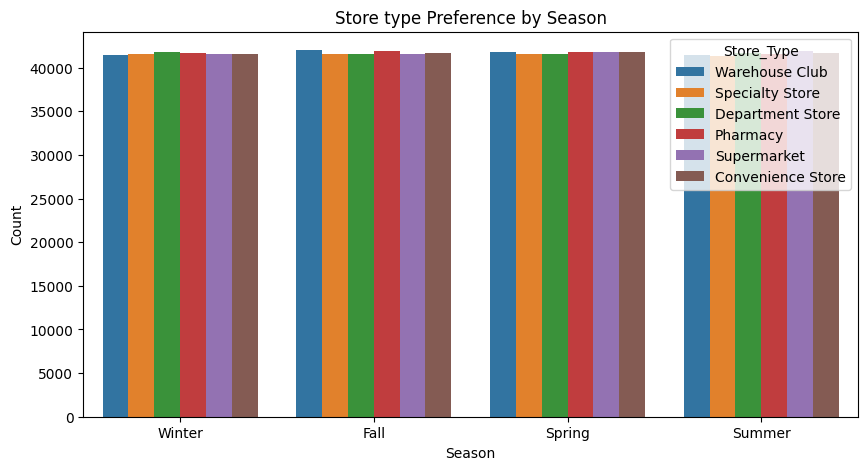

In [87]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Season", hue="Store_Type")
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Store type Preference by Season")
plt.show()

In [88]:
# seasonal preferences for certain store types & customer categories
seasonal_preference = df.groupby(["Season", "Customer_Category","Store_Type"]).size()
print(seasonal_preference)


Season  Customer_Category  Store_Type       
Fall    Homemaker          Convenience Store    5234
                           Department Store     5202
                           Pharmacy             5249
                           Specialty Store      5280
                           Supermarket          5228
                                                ... 
Winter  Young Adult        Department Store     5169
                           Pharmacy             5093
                           Specialty Store      5198
                           Supermarket          5215
                           Warehouse Club       5214
Length: 192, dtype: int64


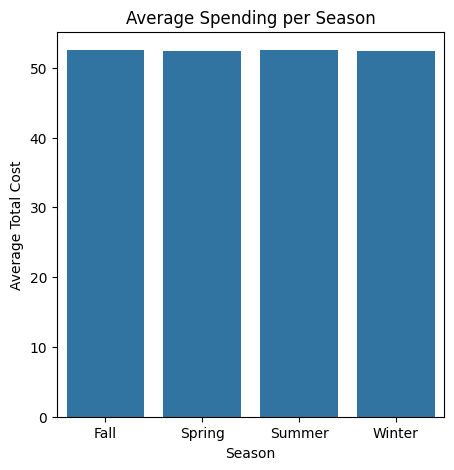

In [89]:
# plot showing average spending per season
avg_spend_season = df.groupby("Season")["Total_Cost"].mean()
plt.figure(figsize=(5, 5))
sns.barplot(x=avg_spend_season.index, y=avg_spend_season)
plt.title('Average Spending per Season')
plt.xlabel('Season')
plt.ylabel('Average Total Cost')
plt.show()

In [90]:
# City with the highest number of transactions
transactions_per_city = df['City'].value_counts().head(1)
print(transactions_per_city)




City
Boston    100566
Name: count, dtype: int64


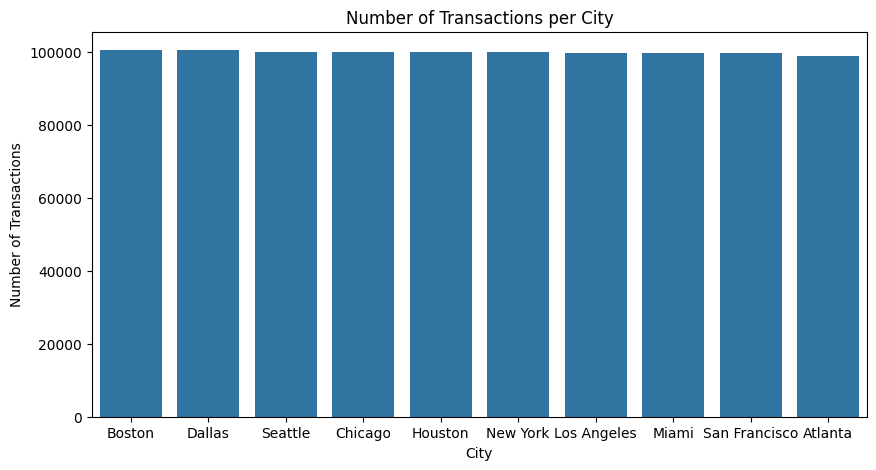

In [91]:
# Bar plot of number of transactions per city
transactions_per_city2 = df['City'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=transactions_per_city2.index, y=transactions_per_city2)
plt.title('Number of Transactions per City')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.show()

In [92]:
# Top 3 cities by revenue
top_cities_by_revenue = df.groupby('City')['Total_Cost'].sum().sort_values(ascending=False).head(3)
print(top_cities_by_revenue)

City
Dallas     5277111.53
Boston     5263307.96
Chicago    5263187.45
Name: Total_Cost, dtype: float64


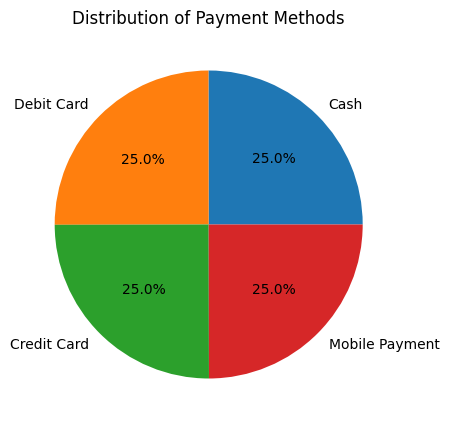

In [93]:
# Pie chart showing distribution of payment methods
payment_method_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.show()

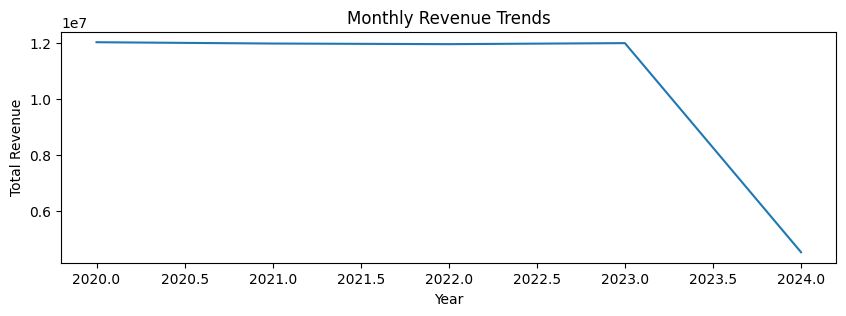

In [94]:
# Line chart of monthly revenue trends
monthly_revenue = df.groupby(['Year'])['Total_Cost'].sum()
plt.figure(figsize=(10, 3))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue)
plt.title('Monthly Revenue Trends')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


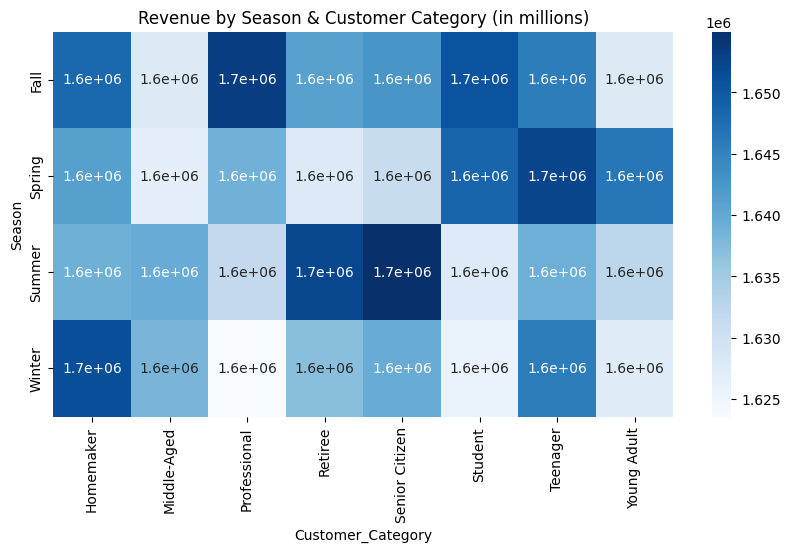

In [95]:
# Heatmap showing revenue by season and customer category
revenue_by_season = df.groupby(['Season', 'Customer_Category'])['Total_Cost'].sum().unstack()
plt.figure(figsize=(10, 5))
sns.heatmap(revenue_by_season, annot=True, cmap="Blues")
plt.title("Revenue by Season & Customer Category (in millions)")
plt.show()


In [96]:
# Key Takeaways
Key_Takeaways = (f"""
- Focus marketing & inventory on {Best_Season.index[0]} season and top cities of {top_cities_by_revenue.index[0]}, {top_cities_by_revenue.index[1]}, {top_cities_by_revenue.index[2]}
- Scale {Best_promo.index[0]} since it yields the highest revenue and/or average spend.
- Prioritize customer segments like {Top_Customer_categories_avg.index[0]}, {Top_Customer_categories_avg.index[1]}, {Top_Customer_categories_avg.index[2]} who show the highest spending power.
- Optimize store experience for {store_type_season.index[0]}, {store_type_season.index[4]}, {store_type_season.index[8]} where it performs best.
                 """)
print(Key_Takeaways)



- Focus marketing & inventory on Fall season and top cities of Dallas, Boston, Chicago
- Scale Discount on Selected Items since it yields the highest revenue and/or average spend.  
- Prioritize customer segments like Homemaker, Middle-Aged, Professional who show the highest spending power.  
- Optimize store experience for ('Convenience Store', 'Fall'), ('Department Store', 'Fall'), ('Pharmacy', 'Fall') where it performs best.
                 
